# CS 109A/AC 209A/STAT 121A Data Science: Homework 7 (Solutions)
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, November 9th, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW7.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import tree
from sklearn import ensemble
from sklearn.cross_validation import KFold
import StringIO
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
range(1,10)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

[Last, First]

### Part (b): Course Number

[CS 109a or STATS 121a or AC 209a]

### Part (c): Who did you work with?

[First and Land names of students with whom you have collaborated]

**All data sets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Monitoring Land Cover Changes Using Satellite Images
In the face of rapid urban development and climate change, it is now more urgent than ever for governments (and other organizations) to have a detailed, accurate and up-to-date picture of land use and land cover, as well as how the land use/cover is changing over time, in order to make effective policy decision to manage and protect natural resources. Building such a comprehensive picture of land use/cover for a large region is extremely difficult. 

Recent improvements in satellite imagery and image process have allowed for new tools in land use/cover analysis. The following is an image of the change in vegetation cover around Belize and Guatamala from 1975 to 2007:

<img src="sat.jpg">

In this problem, we will explore how to use classifiers to detect the presence and location of vegetation in satellite images.


### Part 1(a): Detecting vegetation in satellite images

The following files contain sampled locations from satellite aerial images: `dataset_1.txt`, ... `dataset_4.txt`. The first two columns contain the normalized latitude and longitude values. The last column indicates whether or not the location contains vegetation, with 1 indicating the presence of vegetaion and 0 indicating otherwise. 

These small sets of labels are typically generated by hand (that is, locations might be classified based on field studies or by cross-referencing with government databases). Your task is to use the labeled locations to train a model that will predict whether a new location is vegetation or non-vegetation.

- Suppose we were asked to write a computer program to automatically identify the vegetation regions on the landscape. How can we use the model fitting algorithms you have studied so far to identify the boundaries of the vegetation regions? In particular, discuss the suitability of the following algorithms for each of the four data sets: 
    - linear or polynomial linear regression
    - linear or polynomial logistic regression
    - linear or quadratic discriminant analysis
    - decision trees

- By a quick visual inspection of each data set, what do you think is the smallest depth decision tree that would provide a good fit of the vegetation boundaries in each case? Does `sklearn`'s decision tree fitting algorithm always provide a good fit for the proposed depth? If not, explain why. Support your answer with suitable visualization.

We provide you with a function `plot_tree_boundary` to visualize a decision tree model on the data set.

In [18]:
#--------  plot_tree_boundary
# A function that visualizes the data and the decision boundaries
# Input: 
#      x (predictors)
#      y (labels)
#      model (the classifier you want to visualize)
#      title (title for plot)
#      ax (a set of axes to plot on)
# Returns: 
#      ax (axes with data and decision boundaries)

def plot_tree_boundary(x, y, model, title, ax):
    # PLOT DATA
    ax.scatter(x[y==1,0], x[y==1,1], c='green')
    ax.scatter(x[y==0,0], x[y==0,1], c='white')
    
    # CREATE MESH
    interval = np.arange(0,1,0.01)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1,1)
    x2 = x2.reshape(-1,1)
    xx = np.concatenate((x1, x2), axis=1)

    # PREDICT ON MESH POINTS
    yy = model.predict(xx)    
    yy = yy.reshape((n, n))

    # PLOT DECISION SURFACE
    x1 = x1.reshape(n, n)
    x2 = x2.reshape(n, n)
    ax.contourf(x1, x2, yy, alpha=0.1, cmap='Greens')
    
    # LABEL AXIS, TITLE
    ax.set_title(title)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    
    return ax

**Solution:**

In [19]:
sat_img_1 = pd.read_csv('datasets/dataset_1.txt', delimiter=',', header=None)
sat_img_1.head()

,0,1,2
0,0.566809,0.788130,1
1,0.400046,0.620933,1
2,0.458702,0.536935,1
3,0.474504,0.638224,1
4,0.558707,0.715527,1


In [21]:
sat_img_2 = pd.read_csv('datasets/dataset_2.txt', delimiter=',', header=None)
sat_img_3 = pd.read_csv('datasets/dataset_3.txt', delimiter=',', header=None)
sat_img_4 = pd.read_csv('datasets/dataset_4.txt', delimiter=',', header=None)

sat_images = [sat_img_1, sat_img_2, sat_img_3, sat_img_4]

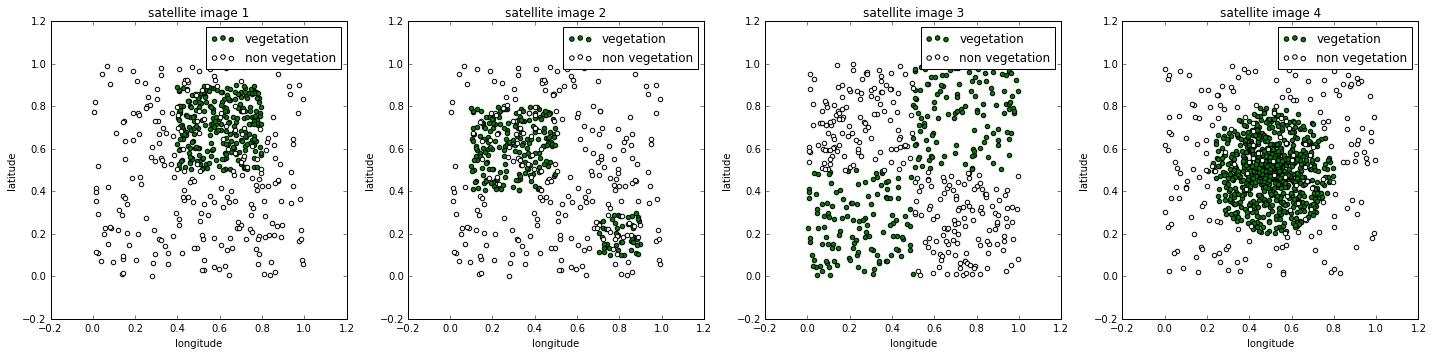

In [22]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

for i in range(4):
    x = sat_images[i].values[:, :-1]
    y = sat_images[i].values[:, -1]
    ax[i].scatter(x[y == 1, 0], x[y == 1, 1], c='green', label='vegetation')
    ax[i].scatter(x[y == 0, 0], x[y == 0, 1], c='white', label='non vegetation')
    ax[i].set_xlabel('longitude')
    ax[i].set_ylabel('latitude')
    ax[i].set_title('satellite image {}'.format(i + 1))
    ax[i].legend()
    
plt.tight_layout()
plt.show() 

The vegetation regions in an image can be identified by treating the latitude and longitude values as predictors and the vegetation information as a binary response, and fitting a classification model. The decision boundaries then allow us to identify the vegetation regions.

- **Linear or quadratic regression:** Since the task at hand is classification, a regression algorithm is not applicable.

- **Linear logistic regression / LDA:** Given that the vegetation regions are rectangular or elliptical in shape, a linear classification is not well-suited.

- **Quadratic logistic regression / QDA:** These methods will be able to accurately detect the vegetation regions in `dataset_4`, but will not be good fits the other data sets.

- **Decision trees:** This method will provide good fits for the first three data sets, where the region boundaries are rectangular. A decision tree is not best suited `dataset_4`, as to get a good fit, the tree depth needs to be very large. 

In [24]:
#--------  fit_and_plot_dt
# Fit decision tree with on given data set with given depth, and plot the data/model
# Input: 
#      fname (string containing file name)
#      depth (depth of tree)

def fit_and_plot_dt(x, y, depth, title, ax):
    # FIT DECISION TREE MODEL
    dt = tree.DecisionTreeClassifier(max_depth = depth)
    dt.fit(x, y)

    # PLOT DECISION TREE BOUNDARY
    ax = plot_tree_boundary(x, y, dt, title, ax)
    
    return ax

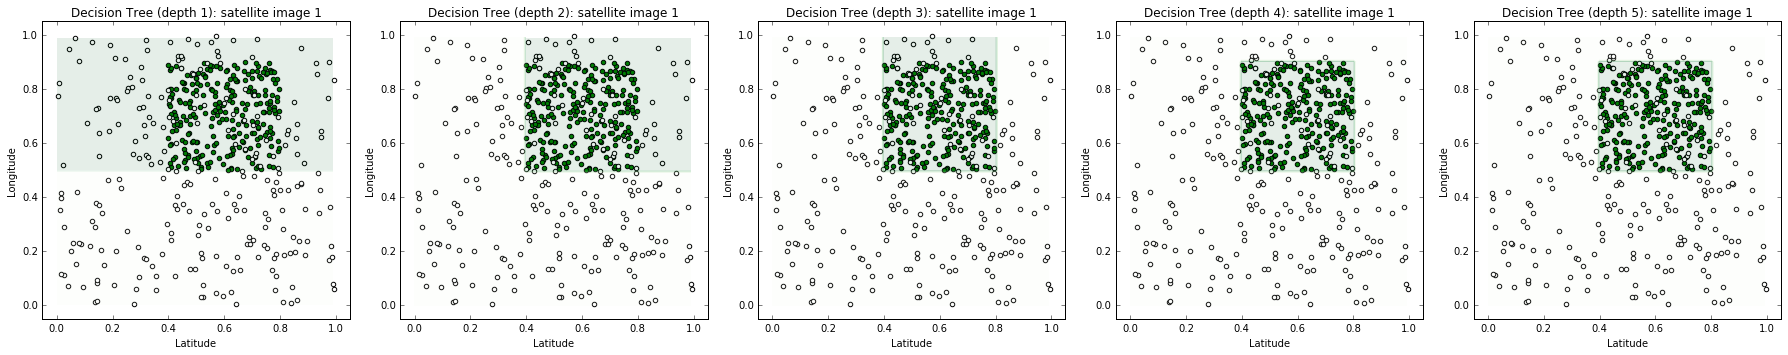

In [25]:
# Plot for dataset_1.txt: depths 1 to 5
fig, ax = plt.subplots(1, len(range(1, 6)), figsize=(25, 5))
x = sat_images[0].values[:, :-1]
y = sat_images[0].values[:, -1]

ind = 0
for i in range(1, 6):
    ax[ind] = fit_and_plot_dt(x, y, i, 'Decision Tree (depth {}): satellite image 1'.format(i), ax[ind]) 
    ind += 1

plt.tight_layout()
plt.show()

Since the vegetation takes the shape of a rectangle, a decision tree of **depth 4** is required, one to check each of left x-limit, right x-limit, lower y-limit and upper y-limit. 

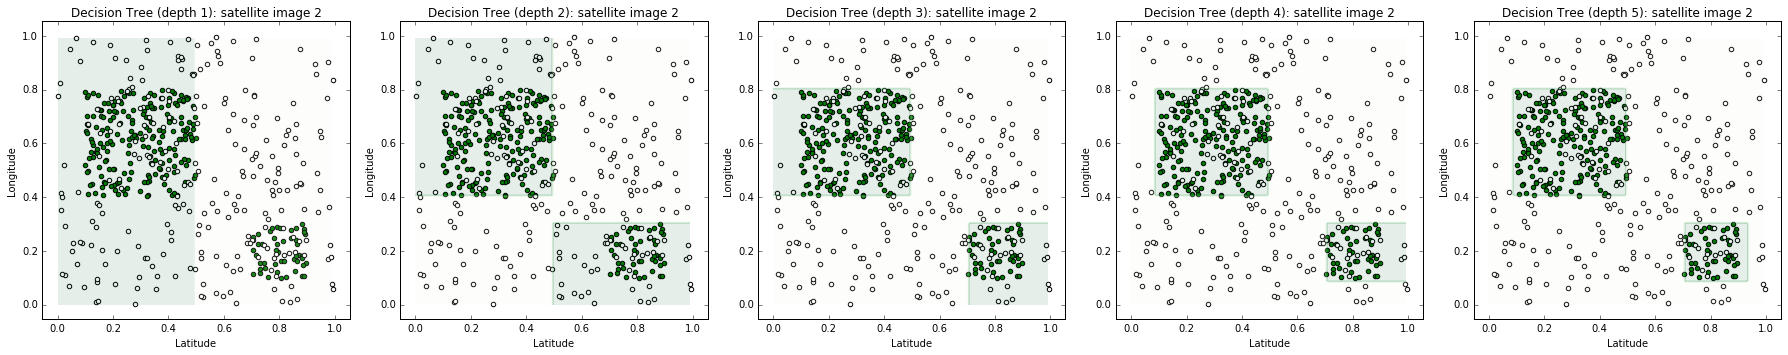

In [26]:
# Plot for dataset_2.txt: depths 1 to 5
fig, ax = plt.subplots(1, len(range(1, 6)), figsize=(25, 5))
x = sat_images[1].values[:, :-1]
y = sat_images[1].values[:, -1]

ind = 0
for i in range(1, 6):
    ax[ind] = fit_and_plot_dt(x, y, i, 'Decision Tree (depth {}): satellite image 2'.format(i), ax[ind]) 
    ind += 1

plt.tight_layout()
plt.show()

The vegetation spans two rectangles, a naive decision tree would require a depth of 8, one for each corner of the two rectangles. However it suffices to use a simpler **5-level** tree: each rectangle can be captured by a decision tree of depth 4, and the root node branches to one of these trees.

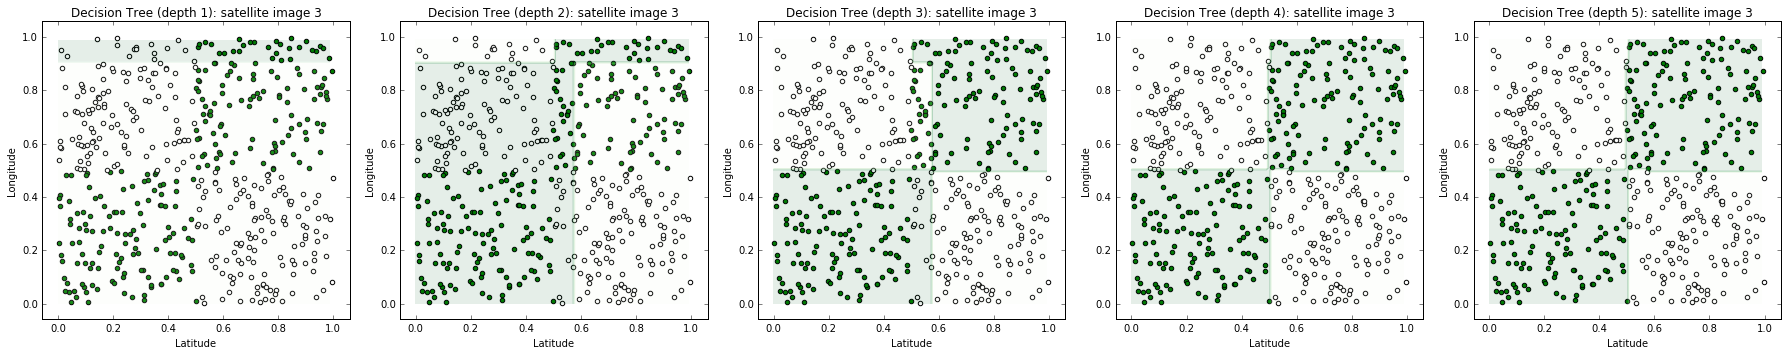

In [27]:
# Plot for dataset_3.txt: depths 1 to 5
fig, ax = plt.subplots(1, len(range(1, 6)), figsize=(25, 5))
x = sat_images[2].values[:, :-1]
y = sat_images[2].values[:, -1]

ind = 0
for i in range(1, 6):
    ax[ind] = fit_and_plot_dt(x, y, i, 'Decision Tree (depth {}): satellite image 3'.format(i), ax[ind]) 
    ind += 1

plt.tight_layout()
plt.show()

A depth 2 decision tree would suffice for this data set. However, due to the **greedy nature** of the fitting algorithm, we need to go up to depth 4 to get a good fit. This is due to a sub-optimal local choice at higher depths.

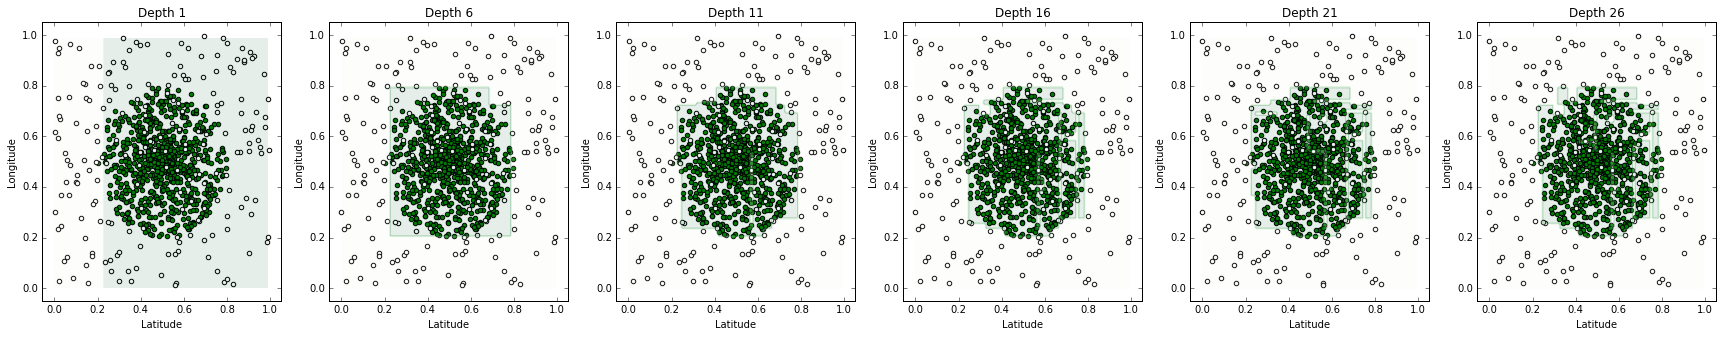

In [28]:
# Plot for dataset_4.txt: depths 4, 10, 25
fig, ax = plt.subplots(1, len(range(1, 27, 5)), figsize=(30, 5))
x = sat_images[3].values[:, :-1]
y = sat_images[3].values[:, -1]
ind = 0
for i in range(1, 27, 5):
    ax[ind] = fit_and_plot_dt(x, y, i, 'Depth {}'.format(i), ax[ind]) 
    ind += 1

Since the vegetation is circular in shape, a decision tree with infinite depth is required to fit this data set.

### Part 1(b). What is the best splitting criterion for decision trees?
Suppose you are given a data set with 100 points in a satellite image, of which 51 are class 1 and 49 are class 0. Consider following two candidate splits for constructing a decision tree: 
1. $((11,37), (40,12))$  
2. $((25,48), (26,1))$

Which of these is a better split according classification error, Gini coefficient, and Entropy criteria? Do the three criteria agree on the best split, or is one better than the other? Support your answer with a concrete explanation.

In [30]:
# Calculate classification accuracy for a binary split
def err(x1, x2):
    return min((x1,x2))

# Calculate Gini coefficient for a binary split
def Gini(x1, x2):
    return x1*(1-x1) + x2*(1-x2)

# Calculate Cross-entropy for a binary split
def entropy(x1, x2):
    return -x1*log(x1) - x2*log(x2)

# Split 1:
# Compute split counts
n11 = 51
n12 = 49
n1 = n11 + n12

# Compute split probabilities
x1 = 11./n11
x2 = 37./n11
y1 = 40./n12
y2 = 12./n12

print('Split 1')
print('Error = ' + str((n11*err(x1,x2)+n12*err(y1,y2))/n1))
print('Gini = ' + str((n11*Gini(x1,x2)+n12*Gini(y1,y2))/n1))
print('Entropy = ' + str((n11*entropy(x1,x2)+n12*entropy(y1,y2))/n1))

print('')

# Compute split counts
n21 = 73
n22 = 27
n2 = n21 + n22

# Split 2:
x1 = 25./n21
x2 = 48./n21
y1 = 26./n22
y2 = 1./n22

print('Split 2')
print('Error = ' + str((n21*err(x1,x2)+n22*err(y1,y2))/n2))
print('Gini = ' + str((n22*Gini(x1,x2)+n22*Gini(y1,y2))/n2))
print('Entropy = ' + str((n22*entropy(x1,x2)+n22*entropy(y1,y2))/n2))

Split 1
Error = 0.23
Gini = 0.351924769908
Entropy = 0.537474171419

Split 2
Error = 0.26
Gini = 0.140858058283
Entropy = 0.216288369906


**Observation:** 
- While Split 1 has lower error, Split 2 is better, as the partitions are *purer* - the right-hand partition contains an almost perfect classification.

- Gini coefficient and Cross-entropy choose Split 2 over Split 1, showing that they promote purer splits. This shows that these are better criteria are than error.

## Problem 2: Loan Risk Assessment
In this problem, you are asked by Bank of America to build a risk assessment model that predicts whether or not it is risky to give a loan to an applicant based on the information provided in their application. The bank will reject the loan applications from applicants labeled risky and approve the applications that are labeled safe by your model.

The relevant training and test sets are provided in the files: `dataset_5_train.txt` and `dataset_5.test.txt`. The first 24 columns contain attributes for each applicant gathered from their application, and the last column contains the credit risk assessment with 1 indicating that the customer is a loan risk, and 0 indicating that the customer is not a loan risk. The names of the attributes are provided in the file `dataset_5_description.txt`.


### Part 2(a): A simple decision tree model
- Fit a simple decision tree of depth 2 to the training set and report its accuracy on the test set. 

- Would you recommend this classifier to Bank of America for making decisions on the loan applications of **real people**? If yes, make an argument for the merrits of this classifer. If no, then make necessary changes to the data set and fit a new classifier that you believe is fair to use in practice, then compare the two classifiers.


We have provided you with a function `display_dt` to display the structure of the decision tree in DOT format.

In [84]:
# Print decision tree model 'dt'
def display_dt(dt):
    dummy_io = StringIO.StringIO() 
    tree.export_graphviz(dt, out_file = dummy_io) 
    print dummy_io.getvalue()

In [85]:
#Testing
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x[-1]

9

In [95]:
# Load train & test data
data_train = np.loadtxt('./datasets/dataset_5_train.txt', delimiter=',')
data_test = np.loadtxt('./datasets/dataset_5_test.txt', delimiter=',')

#See what the ordering of predictors is in terms of probability of one, for
#Census tract
# print data_train
unique_census_codes = np.unique(data_train[:,0])
fraction_one = []
for code in unique_census_codes:
    code_indices = data_train[:,0]==code
    fraction_one.append(np.sum(data_train[code_indices, -1])/sum(code_indices))

print fraction_one
print unique_census_codes

#Change values so that they are in order of probability of outcome 1
sorted_indices = np.argsort(fraction_one)
print sorted_indices
#sorted_indices

#Assign new census codes, in increasing order
# print np.shape(unique_census_codes)
new_codes = np.arange(0,np.shape(unique_census_codes)[0])
# new_codes_rearranged = new_codes[sorted_indices]
print new_codes
i = 0
for code in unique_census_codes:
    code_indices = data_train[:,0]==code
    #what is the new code to assign
    this_new_code = np.argwhere(sorted_indices==i)
#     print this_new_code
    #Change training data
    data_train[code_indices,0] = this_new_code
    #Change testing data
    code_indices_test = data_test[:,0]==code
    data_test[code_indices_test,0] = this_new_code
    i = i + 1
    
#See if it worked
fraction_one_new = []
for code in new_codes:
    code_indices = data_train[:,0]==code
    fraction_one_new.append(np.sum(data_train[code_indices, -1])/sum(code_indices))

print fraction_one_new

[0.96153846153846156, 0.95454545454545459, 0.90476190476190477, 0.125, 0.0, 0.052631578947368418, 1.0, 0.14285714285714285, 0.0, 1.0, 0.125, 1.0]
[ 3001.  3123.  3288.  3298.  3420.  3530.  3540.  3585.  3652.  3662.
  3817.  3827.]
[ 4  8  5  3 10  7  2  1  0  6  9 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[0.0, 0.0, 0.052631578947368418, 0.125, 0.125, 0.14285714285714285, 0.90476190476190477, 0.95454545454545459, 0.96153846153846156, 1.0, 1.0, 1.0]


In [96]:
#Same as above, but for marital status

#See what the ordering of predictors is in terms of probability of one, for
#Census tract
# print data_train
unique_marital_codes = np.unique(data_train[:,4])
fraction_one = []
code_indices = []
code_indices_test = []
i = 0
for code in unique_marital_codes:
    code_indices.append(data_train[:,4]==code)
    code_indices_test.append(data_test[:,4]==code)
    fraction_one.append(np.sum(data_train[code_indices[i], -1])/sum(code_indices[i]))
    i = i + 1

print fraction_one
print unique_marital_codes

#Change values so that they are in order of probability of outcome 1
sorted_indices = np.argsort(fraction_one)
print sorted_indices
#sorted_indices

#Assign new marital codes, in increasing order
# print np.shape(unique_census_codes)
new_codes = np.arange(0,np.shape(unique_marital_codes)[0])
# new_codes_rearranged = new_codes[sorted_indices]
print new_codes
i = 0
for code in unique_marital_codes:
    #what is the new code to assign (there is a more straightforward way)
    this_new_code = np.argwhere(sorted_indices==i)
    print this_new_code
    #Change training data
    data_train[code_indices[i],4] = this_new_code
    #Change testing data
    data_test[code_indices_test[i],4] = this_new_code
    i = i + 1
    
#See if it worked
fraction_one_new = []
for code in new_codes:
    code_indices_new = data_train[:,4]==code
    fraction_one_new.append(np.sum(data_train[code_indices_new, -1])/sum(code_indices_new))

print fraction_one_new

[0.53000000000000003, 0.50344827586206897, 0.40000000000000002]
[ 1.  2.  3.]
[2 1 0]
[0 1 2]
[[2]]
[[1]]
[[0]]
[0.40000000000000002, 0.50344827586206897, 0.53000000000000003]


In [97]:
#Same as above, but for education

#See what the ordering of predictors is in terms of probability of one, for
#Census tract
# print data_train
unique_education_codes = np.unique(data_train[:,3])
fraction_one = []
code_indices = []
code_indices_test = []
i = 0
for code in unique_education_codes:
    code_indices.append(data_train[:,3]==code)
    code_indices_test.append(data_test[:,3]==code)
    fraction_one.append(np.sum(data_train[code_indices[i], -1])/sum(code_indices[i]))
    i = i + 1

print fraction_one
print unique_education_codes

#Change values so that they are in order of probability of outcome 1
sorted_indices = np.argsort(fraction_one)
print sorted_indices
#sorted_indices

#Assign new education codes, in increasing order
# print np.shape(unique_census_codes)
new_codes = np.arange(0,np.shape(unique_education_codes)[0])
# new_codes_rearranged = new_codes[sorted_indices]
print new_codes
i = 0
for code in unique_education_codes:
    #what is the new code to assign (there is a more straightforward way)
    this_new_code = np.argwhere(sorted_indices==i)
    print this_new_code
    #Change training data
    data_train[code_indices[i],3] = this_new_code
    #Change testing data
    data_test[code_indices_test[i],3] = this_new_code
    i = i + 1
    
#See if it worked
fraction_one_new = []
for code in new_codes:
    code_indices_new = data_train[:,3]==code
    fraction_one_new.append(np.sum(data_train[code_indices_new, -1])/sum(code_indices_new))

print fraction_one_new

[0.4264705882352941, 0.57857142857142863, 0.42499999999999999, 0.0, 1.0]
[ 1.  2.  3.  4.  6.]
[3 2 0 1 4]
[0 1 2 3 4]
[[2]]
[[3]]
[[1]]
[[0]]
[[4]]
[0.0, 0.42499999999999999, 0.4264705882352941, 0.57857142857142863, 1.0]


In [98]:
# Load train & test data
# data_train = np.loadtxt('./datasets/dataset_5_train.txt', delimiter=',')
# data_test = np.loadtxt('./datasets/dataset_5_test.txt', delimiter=',')

# Split label and instances
y_train = data_train[:,-1]
x_train = data_train[:,0:-1]

y_test = data_test[:,-1]
x_test = data_test[:,0:-1]

# Fit DT model with 2 levels
dt = tree.DecisionTreeClassifier(max_depth=2)
dt.fit(x_train, y_train)
print 'Test accuracy:', dt.score(x_test, y_test)

# Display tree:
print '\nDecision tree model:'
display_dt(dt)

Test accuracy: 0.901333333333

Decision tree model:
digraph Tree {
node [shape=box] ;
0 [label="X[0] <= 5.5\ngini = 0.4997\nsamples = 250\nvalue = [122, 128]"] ;
1 [label="X[6] <= 1.5\ngini = 0.1605\nsamples = 125\nvalue = [114, 11]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.1367\nsamples = 122\nvalue = [113, 9]"] ;
1 -> 2 ;
3 [label="gini = 0.4444\nsamples = 3\nvalue = [1, 2]"] ;
1 -> 3 ;
4 [label="X[17] <= 169391.0\ngini = 0.1198\nsamples = 125\nvalue = [8, 117]"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="gini = 0.095\nsamples = 120\nvalue = [6, 114]"] ;
4 -> 5 ;
6 [label="gini = 0.48\nsamples = 5\nvalue = [2, 3]"] ;
4 -> 6 ;
}


In [93]:
#***
# x_train.dtype
print x_train

[[  3.28800000e+03   2.00000000e+04   2.00000000e+00 ...,   3.90000000e+02
    0.00000000e+00   4.43340000e+04]
 [  3.00100000e+03   5.00000000e+04   1.00000000e+00 ...,   0.00000000e+00
    4.98000000e+04   0.00000000e+00]
 [  3.28800000e+03   8.00000000e+04   1.00000000e+00 ...,   3.00000000e+03
    2.00000000e+03   4.00000000e+03]
 ..., 
 [  3.28800000e+03   5.00000000e+04   1.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  3.53000000e+03   2.80000000e+05   2.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  3.28800000e+03   1.80000000e+05   2.00000000e+00 ...,   1.50000000e+03
    1.10000000e+04   1.00000000e+03]]


**Observation:** One of the predictors made use of by classifier is the census code of the applicant. Looking at the supplementary file, it appears the the census code of an applicant is based his residential area, and in turn, correlated with his race. Thus the classifier would discriminate applications based on their race. I would therefore not use this classifier in practice.

In [94]:
# Remove census code predictor
x_train = x_train[:, 1:]
x_test = x_test[:, 1:]

# Fit DT model with 2 levels o
dt = tree.DecisionTreeClassifier(max_depth=2)
dt.fit(x_train, y_train)
print 'Test accuracy of fairer class:', dt.score(x_test, y_test)
display_dt(dt)

Test accuracy of fairer class: 0.604307692308
digraph Tree {
node [shape=box] ;
0 [label="X[5] <= 0.5\ngini = 0.4997\nsamples = 250\nvalue = [122, 128]"] ;
1 [label="X[20] <= 2902.5\ngini = 0.4665\nsamples = 170\nvalue = [107, 63]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.5\nsamples = 103\nvalue = [51, 52]"] ;
1 -> 2 ;
3 [label="gini = 0.2744\nsamples = 67\nvalue = [56, 11]"] ;
1 -> 3 ;
4 [label="X[8] <= 1.0\ngini = 0.3047\nsamples = 80\nvalue = [15, 65]"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="gini = 0.4286\nsamples = 45\nvalue = [14, 31]"] ;
4 -> 5 ;
6 [label="gini = 0.0555\nsamples = 35\nvalue = [1, 34]"] ;
4 -> 6 ;
}


### Part 2(b): An ensemble of decision trees

- One way to improve the prediciton accuracy for this task is to use an ensemble of decision trees fitted on random samples, as follows: given a training set of size $n$, sample new training sets uniformly with replacement, and fit a decision tree model on each random sample.

  Now, how would you combine the ensemble into a single classifier? There are at lease two ways:

   - *Random classifier*: predict using a randomly chosen decision tree from the ensemble
   - *Majority classifier*: predict using the majority vote from decision trees in the ensemble
   
   

- We can also fit a *Random Forest* model for our data.

**Note:**  The Random Forest approach can easily overfit the training set. What are the important parameters in `sklearn`'s Random Forest fitting function that influence the model fit? For the risk assessment task, you **need** to fit your random forest model by using a suitable model selection procedure to tune these parameters.

**Question:** Is there a significant difference in the prediction accuracies of the above three approaches? If so, explain why.



In [269]:
# No. of trials
n_trials = 100
n_train = x_train.shape[0]
n_test = x_test.shape[0]

# No. of points to sample
n_sample = n_train

# List of models
dt_list = []

# Loop over trials
for i in range(0, n_trials):
    # Split randomly into train-test
    indices = np.random.randint(0, n_sample, size = n_sample)

    x_sample = x_train[indices, :]
    y_sample = y_train[indices]

    # Fit DT model
    dt = tree.DecisionTreeClassifier(max_depth = 2)
    dt.fit(x_sample, y_sample)
    
    # Append model to DT list
    dt_list.append(dt)

# Accuracy of random classifier
test_accuracy_random = 0

# Iterate over all test points
for j in range(n_test):
    classifier_ind = np.random.randint(0, n_trials)
    y_pred_j = dt_list[classifier_ind].predict(x_test[j,:].reshape(1,-1))
    test_accuracy_random += (y_test[j] == y_pred_j[0])

test_accuracy_random /= n_test*1.0

print 'Test accuracy for random combining strategy:', test_accuracy_random

# Accuracy of majority classifier
y_pred_tot = np.zeros(n_test)
for i in range(n_trials):
    y_pred_tot += dt_list[i].predict(x_test)

y_pred_maj = np.zeros(n_test)
y_pred_maj[y_pred_tot > n_trials/2.] = 1

test_accuracy_maj = np.mean(y_test == y_pred_maj)

print 'Test accuracy for majority combining strategy', test_accuracy_maj

Test accuracy for random combining strategy: 0.61158974359
Test accuracy for majority combining strategy 0.652205128205


**Observation:** The accuracy random combining strategy can be no greater than that of the single-best classifier in the ensemble. On the other hand, the majority combining strategy can exceed the accuracy of the individual classifiers. Hence, this is a better way to combine an ensemble of classifiers.

Two important parameters of `sklearn`'s Random Forest module that influence the model fit are the *number of trees*: `n_estimators` and the maximum depth of the trees `max_depth`. Below, we tune both these parameters using 5-fold cross-validation on 2D grid of parameter values.

In [209]:
# Parameters for tuning
n_trees = np.arange(10, 100, 20)  # Trees and depth are explored on an exponentially growing space,
depths = np.arange(2, 10)   # since it is assumed that trees and depth will add accuracy in a decaying fashion.

# To keep track of the best model
best_score = 0

# Run grid search for model with 5-fold cross validation
print '5-fold cross validation:'

for trees in n_trees:
    for depth in depths:
        
        # Cross validation for every experiment
        k_folds = KFold(x_train.shape[0], n_folds=5, shuffle=True)
        scores = []
        for train_indices, validation_indices in k_folds:
            x_train_cv = x_train[train_indices]
            y_train_cv = y_train[train_indices]

            x_validate = x_train[validation_indices]
            y_validate = y_train[validation_indices]
            
            model = ensemble.RandomForestClassifier(n_estimators=trees, max_depth=depth)
            model.fit(x_train_cv, y_train_cv)
            scores += [model.score(x_validate, y_validate)]
        
        # Record and report accuracy
        average_score = np.mean(scores)
        print "Trees:", trees, "Depth:", depth, "Score:", average_score
        if average_score > best_score:
            best_score = average_score
            best_trees = trees
            best_depth = depth

# Fit model on entire train set using chosen number of trees and depth
model = ensemble.RandomForestClassifier(n_estimators = best_trees, max_depth = best_depth)
model.fit(x_train, y_train)

print 'Chosen number of trees, depth:', best_trees, ',', best_depth
print 'Test accuracy:', model.score(x_test, y_test)

5-fold cross validation:
Trees: 10 Depth: 2 Score: 0.652
Trees: 10 Depth: 3 Score: 0.656
Trees: 10 Depth: 4 Score: 0.704
Trees: 10 Depth: 5 Score: 0.66
Trees: 10 Depth: 6 Score: 0.66
Trees: 10 Depth: 7 Score: 0.644
Trees: 10 Depth: 8 Score: 0.684
Trees: 10 Depth: 9 Score: 0.684
Trees: 30 Depth: 2 Score: 0.7
Trees: 30 Depth: 3 Score: 0.688
Trees: 30 Depth: 4 Score: 0.684
Trees: 30 Depth: 5 Score: 0.664
Trees: 30 Depth: 6 Score: 0.692
Trees: 30 Depth: 7 Score: 0.692
Trees: 30 Depth: 8 Score: 0.676
Trees: 30 Depth: 9 Score: 0.66
Trees: 50 Depth: 2 Score: 0.676
Trees: 50 Depth: 3 Score: 0.656
Trees: 50 Depth: 4 Score: 0.68
Trees: 50 Depth: 5 Score: 0.66
Trees: 50 Depth: 6 Score: 0.692
Trees: 50 Depth: 7 Score: 0.668
Trees: 50 Depth: 8 Score: 0.664
Trees: 50 Depth: 9 Score: 0.716
Trees: 70 Depth: 2 Score: 0.684
Trees: 70 Depth: 3 Score: 0.672
Trees: 70 Depth: 4 Score: 0.66
Trees: 70 Depth: 5 Score: 0.656
Trees: 70 Depth: 6 Score: 0.664
Trees: 70 Depth: 7 Score: 0.652
Trees: 70 Depth: 8 Scor

## Challenge Problem: Boosting for Classification

We've seen in class that boosting is a useful ensemble method to combine a collection of simple regression trees into a powerful regression model. Chapter 10.1 of the text book ([*J.H. Friedman, R. Tibshirani, and T. Hastie, "The Elements of Statistical Learning"*](http://statweb.stanford.edu/~tibs/ElemStatLearn/)) describes the boosting technique for classification trees. Implement the method from scratch.
    
Write a function `fit_and_score_boosted_trees` satisfying:
- Input:
    - `x_train`:  Array of predictors in training set
    - `y_train`:  Array of binary responses in training set
    - `x_test`:  Array of predictors in training set
    - `y_test`:  Array of binary responses in training set
    - `M`:  Number of iterations / Number of decision trees in the ensemble
    - `depth`:  Depth of each decision tree
- Fits an ensemble of `T` decision trees to the training set
- Output:
    - `test_accuracy`:  classification accuracy of the ensemble on the test set

Your function will also have to **standardise** the predictors in the training and test sets before applying boosting.
   
**Hints:** 
- `sklearn`'s decision tree learning routine has an option to specific weights on the training points
- `sklearn`'s classifiers make predictions in {0,1} while the book assumes predictions in {-1, 1}

Your implementation will be evaluated based on three test cases: 

`challenge_testcase_1_train.txt`, `challenge_testcase_1_test.txt`

`challenge_testcase_2_train.txt`, `challenge_testcase_2_test.txt`

`challenge_testcase_3_train.txt`, `challenge_testcase_3_test.txt`

**Run the code given below to test your implementation. Call `test_implementation` and pass it your function `fit_and_score_boosted_trees`.**

In [2]:
#--------  test_implementation
# A function that tests your fit_and_score_boosted_trees function using three test sets.
# Input: 
#      fit_and_score_boosted_trees (your implementation of the boosting function)
# Returns: 
#      None

def test_implementation(fit_and_score_boosted_trees):
    
    # Iterate over test cases
    for i in range(1,4):
        # Load train & test data
        data_train = np.loadtxt('datasets/challenge_testcase_' + str(i) + '_train.txt', delimiter=',')
        data_test = np.loadtxt('datasets/challenge_testcase_' + str(i) + '_test.txt', delimiter=',')

        # Split label and instances
        y_train = data_train[:,-1]
        x_train = data_train[:,0:-1]

        y_test = data_test[:,-1]
        x_test = data_test[:,0:-1]

        # Run boosting function
        print 'Test case', i, ':', fit_and_score_boosted_trees(x_train, y_train, x_test, y_test, 10, 2)    

0.016
1.26796845387


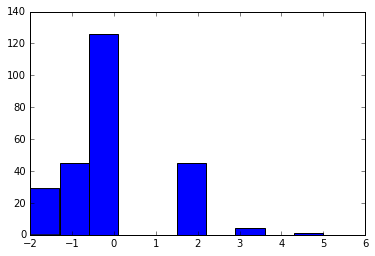

In [11]:
#***
explore_data = np.loadtxt('datasets/challenge_testcase_1_train.txt', delimiter=',')
# np.shape(explore_data)
this_data = explore_data[:,2]
# this_data = this_data/np.std(this_data)
plt.hist(this_data)
print np.mean(this_data)
print np.std(this_data)

**Solutions:**

In [16]:
#--------  fit_and_score_boosted_trees
# Fit boosted decision trees on training set, and evaluate them on the test set
# Input: 
#   x_train (Array of predictors in training set)
#   y_train (Array of binary responses in training set)
#   x_test (Array of predictors in training set)
#   y_test (Array of binary responses in training set)
#   M (Number of iterations / Number of decision trees in the ensemble)
#   depth (Depth of each decision tree)
# Output:
#   test_accuracy (classification accuracy of the ensemble on the test set)

def fit_and_score_boosted_trees(x_train, y_train, x_test, y_test, M, depth):
    # Standardize train and test sets, compute SD on train set
    std_train = x_train.std(axis = 0)
    std_test = x_test.std(axis = 0)

    # CHECK FOR 0 STD-DEV TO AVOID DIVIDE BY ZERO!!!
    std_train[std_train == 0] = 1
    std_test[std_test == 0] = 1

    x_train = x_train / std_train
    x_test = x_test / std_test
    
    # CONVERT LABELS TO 0, 1
    label_list = np.unique(y_train)
    for i in range(label_list.shape[0]):
        y_train[y_train == label_list[i]] = i
        y_test[y_test == label_list[i]] = i
    
    # Train set size
    N = x_train.shape[0]
    
    # Initialize sample weights
    w = np.ones(N) / N 
    
    # List of classifiers, weights on classifiers
    G_list = []
    alpha = np.zeros(M)
    
    for m in range(M):
        # Fit DT with sample weights 'w'
        G_m = tree.DecisionTreeClassifier(max_depth = depth)
        G_m.fit(x_train, y_train, sample_weight = w)
        y_pred = G_m.predict(x_train)
        
        # Compute weighted error
        err_m = np.sum(w * (y_train != y_pred)) / w.sum()
                
        # Compute weight on classifier
        alpha[m] = np.log((1 - err_m) / err_m)
        
        # Update sample weights
        w = w * np.exp(alpha[m] * (y_train != y_pred))
        
        # Append DT to classifier list
        G_list.append(G_m)

    # Accuracy of majority classifier
    y_pred_tot = np.zeros(x_test.shape[0])
    
    # Record total score for each test point
    for m in range(M):
        # Make predictions using classifier G_m
        y_pred = G_list[m].predict(x_test)
        
        # Computed weighted score, after converting to {-1, 1}!!!
        y_pred_tot += alpha[m] * (2 * y_pred - 1)

    # Take sign of score
    y_pred_ensemble = np.sign(y_pred_tot)
    
    # Convert back to {0,1}
    y_pred_ensemble[y_pred_ensemble == -1] = 0
    
    # Return accuracy on test set
    test_accuracy = np.mean(y_test == y_pred_ensemble)
    return test_accuracy

In [17]:
test_implementation(fit_and_score_boosted_trees)

Test case 1 : 0.617333333333
Test case 2 : 0.617538461538
Test case 3 : 0.617333333333
